Heart disease UCI</br>age : age in years</br>
sex : (1 = male; 0 = female)</br>
cp : chest pain type (4 values) </br>
trestbps : resting blood pressure (in mm Hg on admission to the hospital)</br>
chol : serum cholestoral in mg/dl</br> 
fbs : fasting blood sugar > 120 mg/dl : (1 = true; 0 = false)</br>
restecg : resting electrocardiographic results (values 0,1,2)</br>
thalach : maximum heart rate achieved</br> 
exang : exercise induced angina</br> 
oldpeak : ST depression induced by exercise relative to rest 
the slope of the peak exercise ST segment</br> 
ca : number of major vessels (0-3) colored by flourosopy</br> 
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [72]:
plt.rcParams["figure.figsize"] = (10,5)

Importing csv file

In [73]:
df = pd.read_csv('data/heart.csv')

In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Separating Numirical and Categorical 

In [75]:
numerical=['age','trestbps','chol','thalach','oldpeak']
categorical=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']

Finding Null values in Features

In [6]:
df.columns[df.isnull().any()]

Index([], dtype='object')

Finding Unique values

In [7]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [8]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [9]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [10]:
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [11]:
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [12]:
df['fbs'].unique()

array([1, 0], dtype=int64)

In [13]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [14]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [15]:
df['exang'].unique()

array([0, 1], dtype=int64)

In [16]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [17]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

In [18]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [19]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [20]:
df['target'].unique()

array([1, 0], dtype=int64)

There is no null values or outliers and next to find Univarite Analysis

-0.2024633654856539

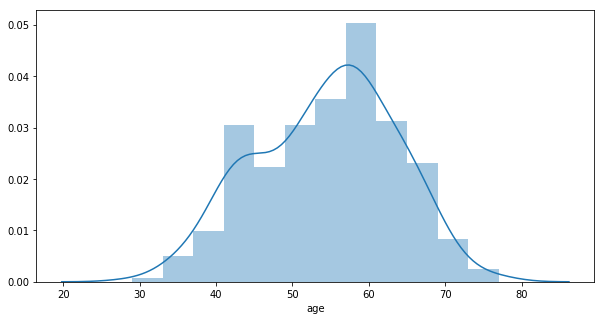

In [21]:
sns.distplot(df['age'])
df['age'].skew()

There is negative skew in age

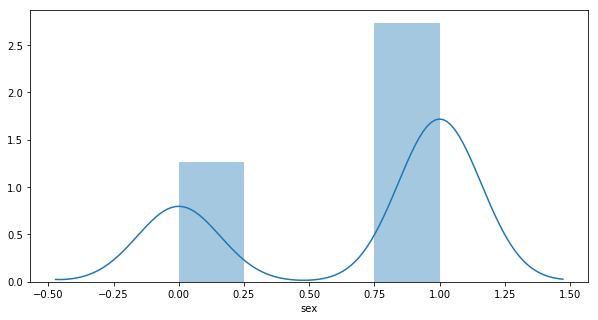

In [22]:
sns.distplot(df['sex'])

Male Patients are More

0.48473236883889675

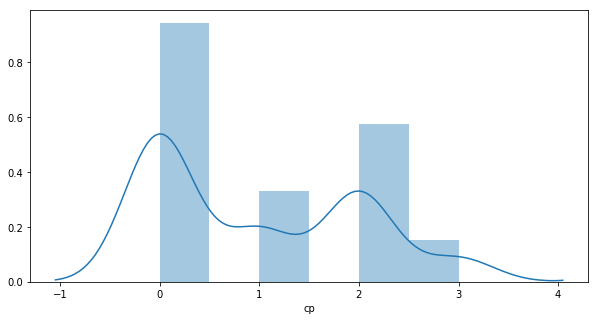

In [23]:
sns.distplot(df['cp'])
df['cp'].skew()

0.7137684379181465

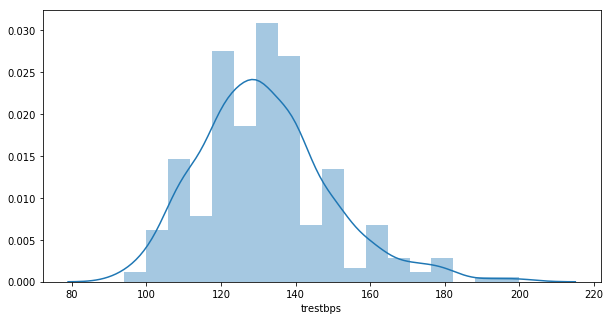

In [24]:
sns.distplot(df['trestbps'])
df['trestbps'].skew()

1.1434008206693387

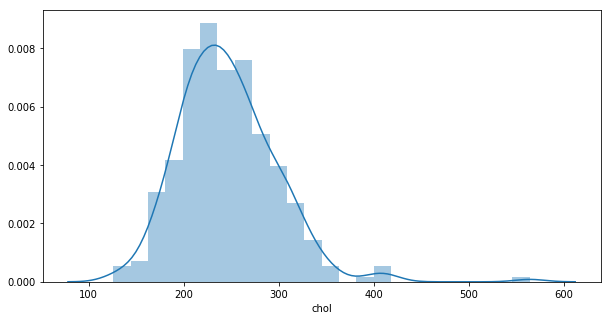

In [25]:
sns.distplot(df['chol'])
df['chol'].skew()

1.986651930914452

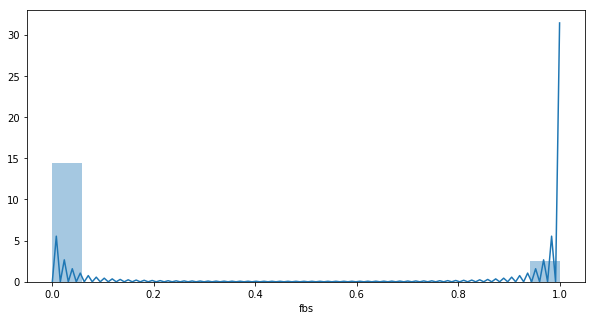

In [26]:
sns.distplot(df['fbs'])
df['fbs'].skew()

0.16252224492761935

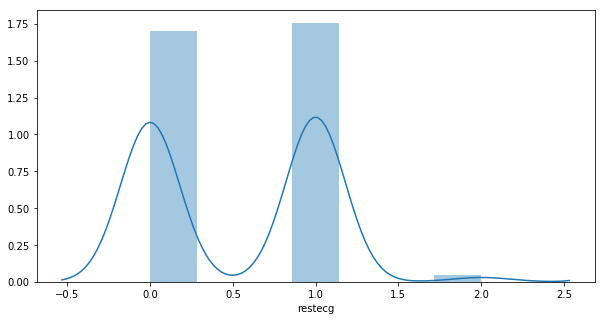

In [27]:
sns.distplot(df['restecg'])
df['restecg'].skew()

-0.5374096526832253

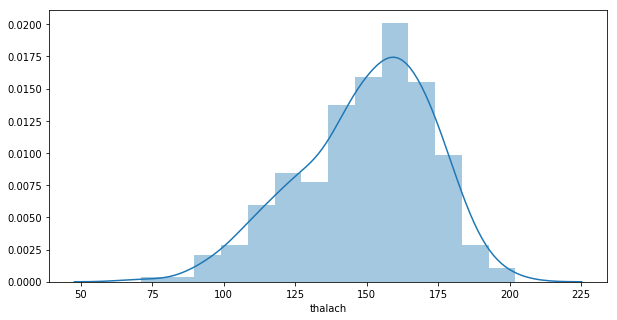

In [28]:
sns.distplot(df['thalach'])
df['thalach'].skew()

0.7425315444212832

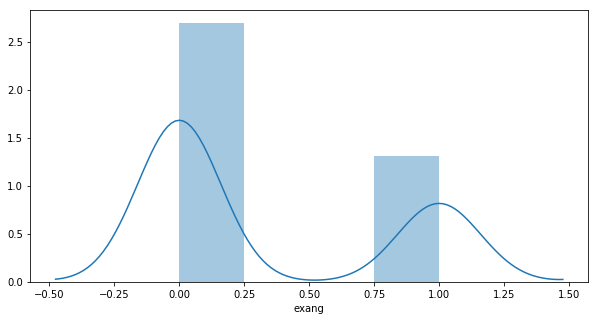

In [29]:
sns.distplot(df['exang'])
df['exang'].skew()

1.269719930601997

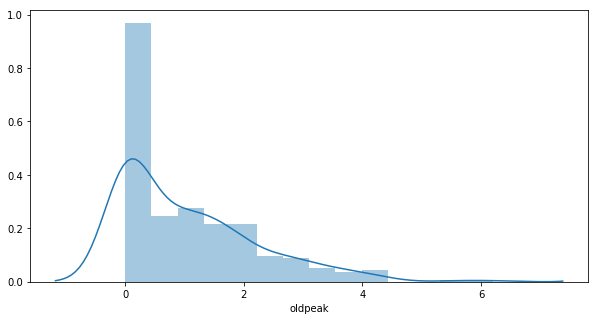

In [30]:
sns.distplot(df['oldpeak'])
df['oldpeak'].skew()

-0.5083156098165442

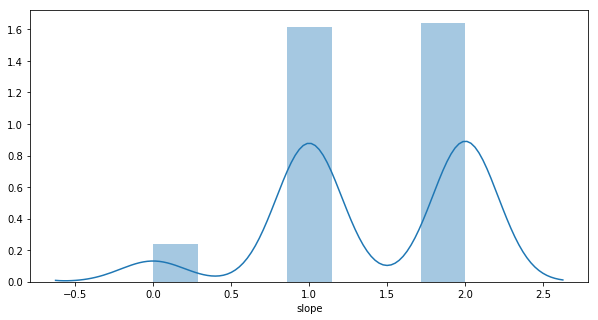

In [31]:
sns.distplot(df['slope'])
df['slope'].skew()

1.3104221354767875

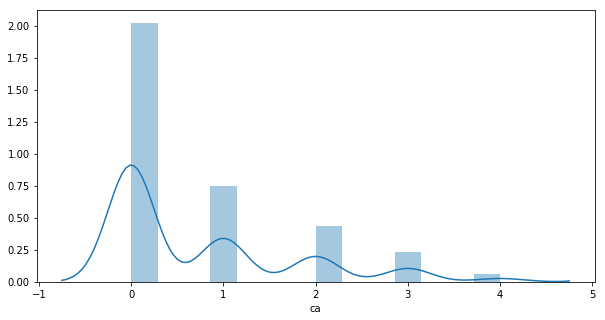

In [32]:
sns.distplot(df['ca'])
df['ca'].skew()

-0.47672219490975737

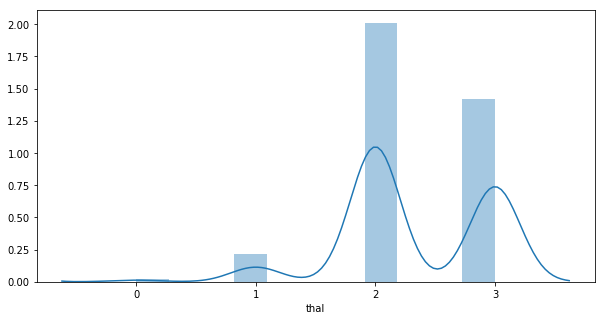

In [33]:
sns.distplot(df['thal'])
df['thal'].skew()

-0.17982105403495655

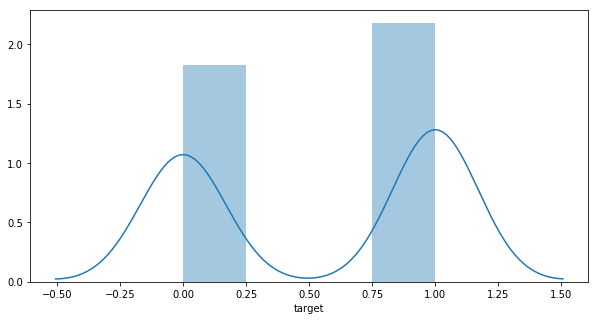

In [34]:
sns.distplot(df['target'])
df['target'].skew()

Bivariate Analysis</br>
TargetValue vs other Features

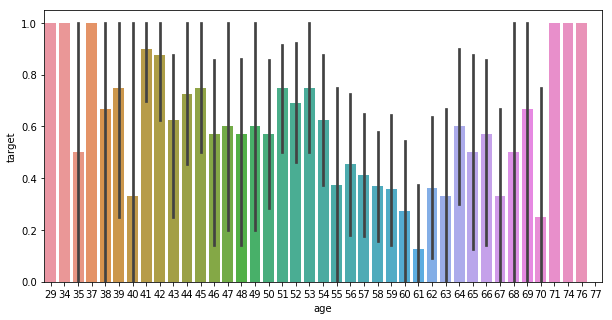

In [35]:
sns.barplot(x='age', y='target', data=df)

age has good relation with target

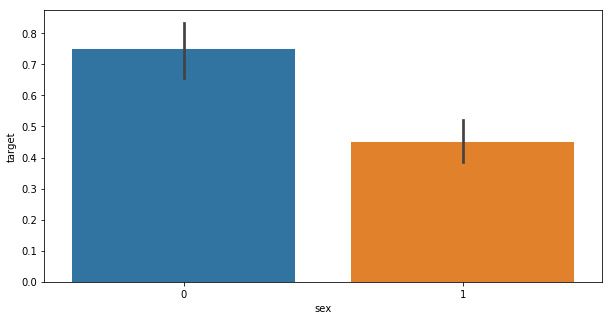

In [36]:
sns.barplot(x='sex', y='target', data=df)

Female patients are more

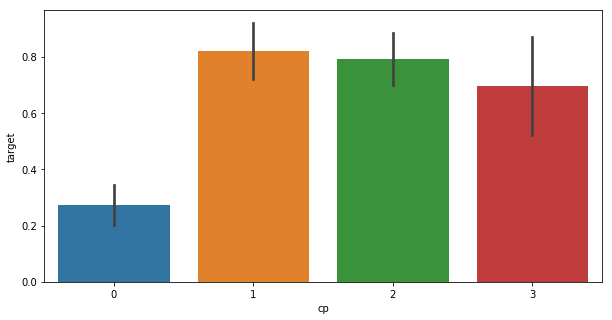

In [37]:
sns.barplot(x='cp', y='target', data=df)

cp type 1 has high risk

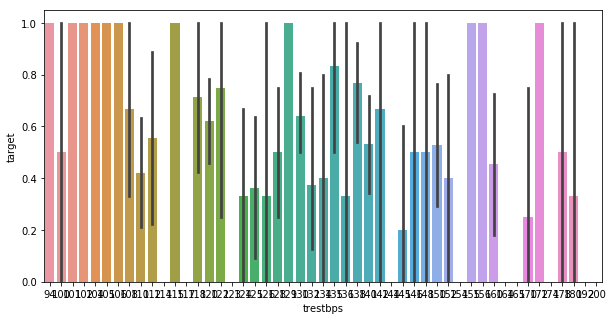

In [38]:
sns.barplot(x='trestbps', y='target', data=df)

trestbps at some values has high risk

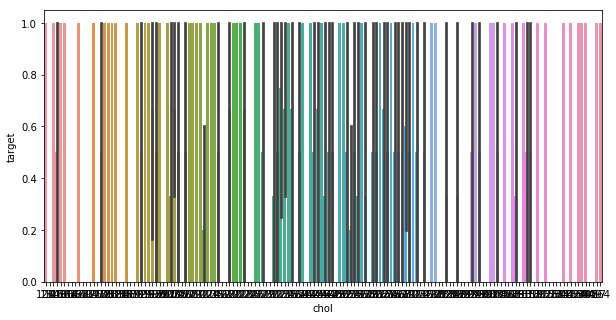

In [39]:
sns.barplot(x='chol', y='target', data=df)

chol is good factor of heart attack

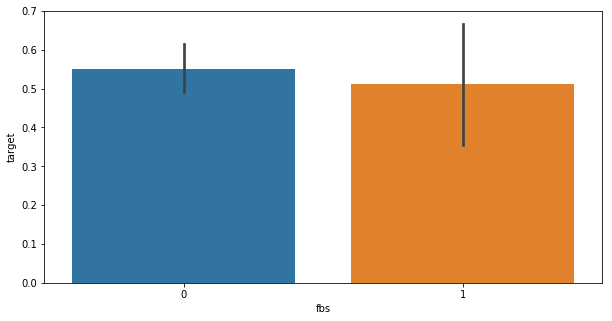

In [40]:
sns.barplot(x='fbs', y='target', data=df)

fbs if low then risk of heart disease is high

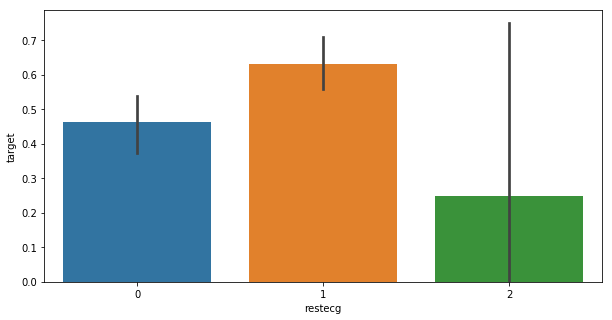

In [41]:
sns.barplot(x='restecg', y='target', data=df)

restecg if 1 then high risk of heart disease

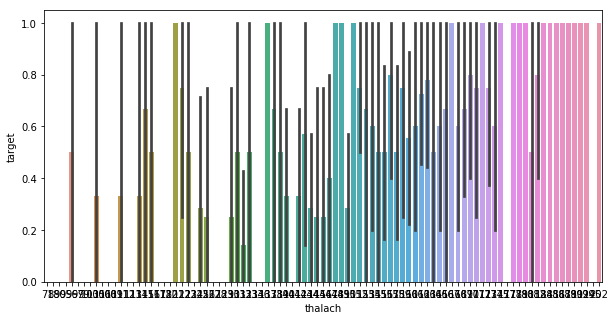

In [42]:
sns.barplot(x='thalach', y='target', data=df)

thalach is high risk of heart disease is also high

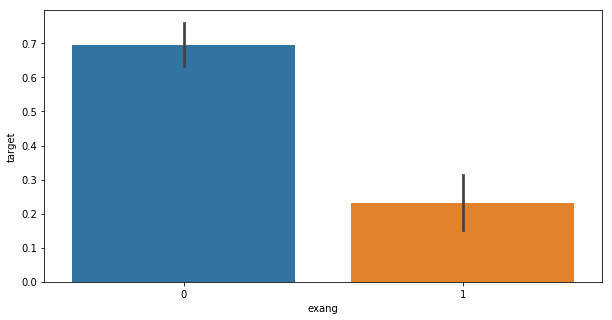

In [43]:
sns.barplot(x='exang', y='target', data=df)

exang is 0 then heart disease is high

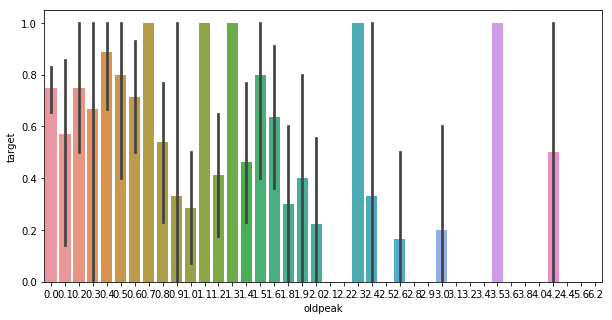

In [44]:
sns.barplot(x='oldpeak', y='target', data=df)

oldpeak is low then induces heart disease

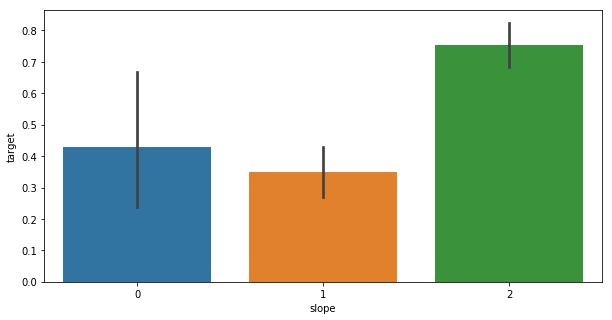

In [45]:
sns.barplot(x='slope', y='target', data=df)

slope 2 is high

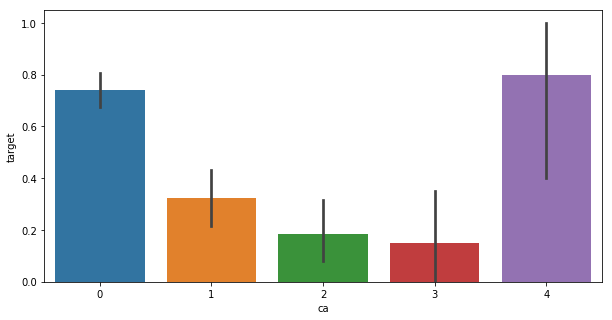

In [46]:
sns.barplot(x='ca', y='target', data=df)

ca-4 is high

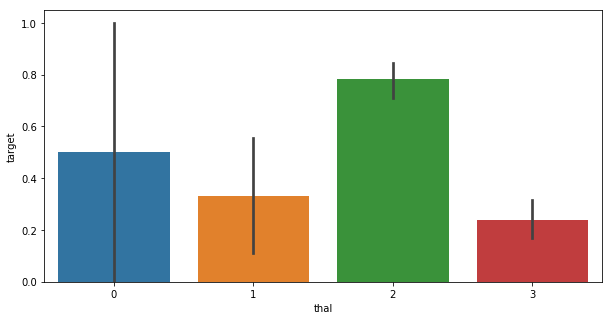

In [47]:
sns.barplot(x='thal', y='target', data=df)

thal-2 is high

Bivariate Analysis</br>
Feature vs Feature

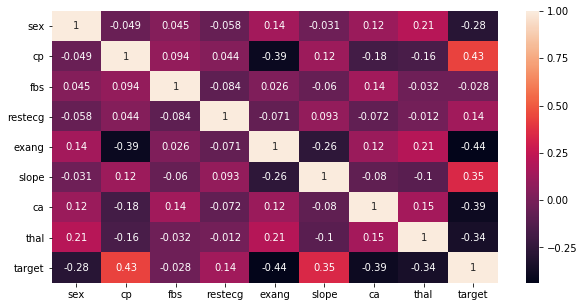

In [48]:
corr = df[categorical].corr()
sns.heatmap(corr, annot=True)

There is some relation between target and cp

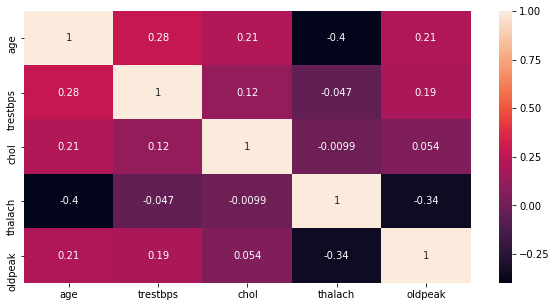

In [49]:
corr = df[numerical].corr()
sns.heatmap(corr, annot=True)

There is some relationship between trestbps and age

From the above analysis.The important Features are found</br>Age,sex,trestbps,chol,cp,restecg,thalach and slope</br>All the data is cleaned and only features found to be skewed

Feature Engineering

0.1604670822515483

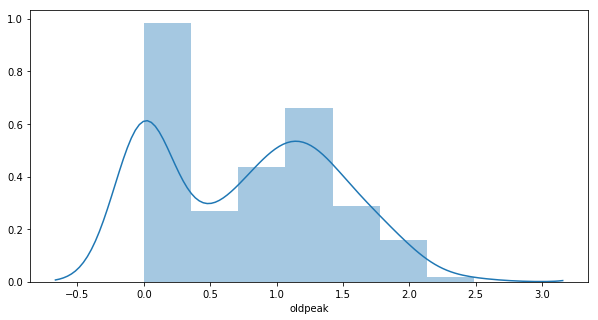

In [76]:
sns.distplot(np.sqrt(df['oldpeak']))
np.sqrt(df['oldpeak']).skew()

-0.22297959302923182

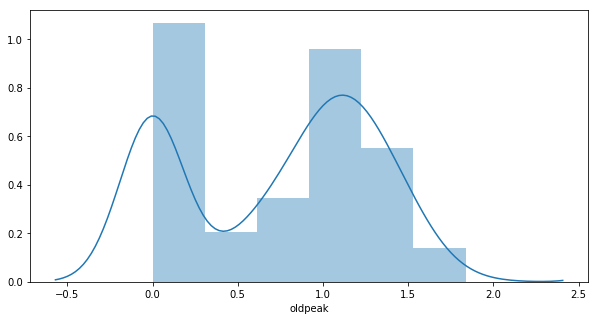

In [77]:
sns.distplot(np.cbrt(df['oldpeak']))
np.cbrt(df['oldpeak']).skew()

SquareRoot gives Good Skew for oldpeak

-0.8317380617160233

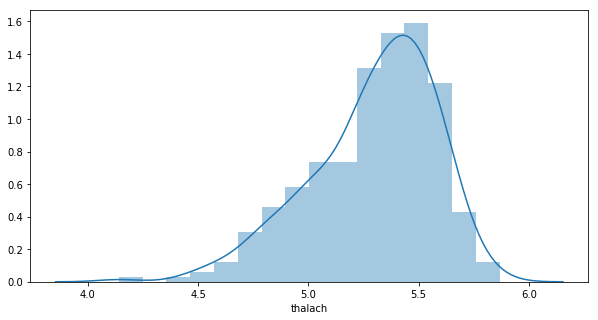

In [78]:
sns.distplot(np.cbrt(df['thalach']))
np.cbrt(df['thalach']).skew()

Roots doesnt give any Good skew for thalach

0.5618001537280997

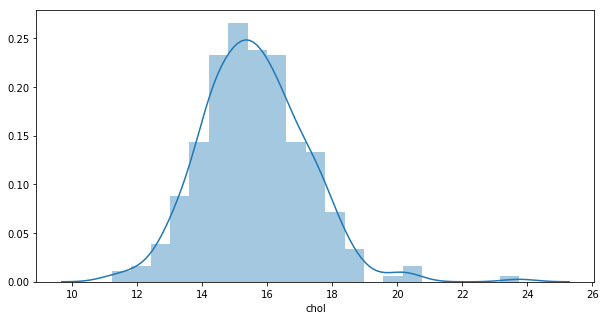

In [79]:
sns.distplot(np.sqrt(df['chol']))
np.sqrt(df['chol']).skew()

0.3947386439573405

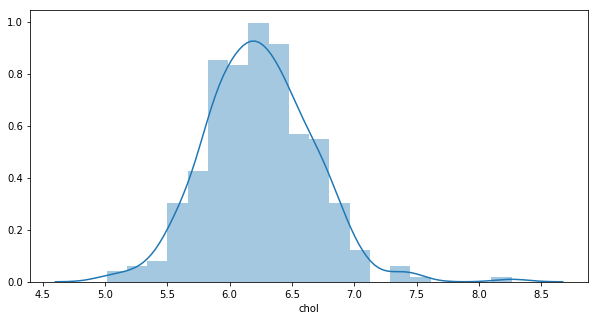

In [80]:
sns.distplot(np.cbrt(df['chol']))
np.cbrt(df['chol']).skew()

CUBE root gives better skew value for chol

0.4932457846840762

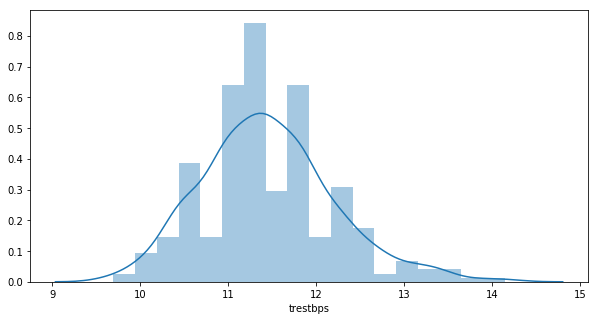

In [81]:
sns.distplot(np.sqrt(df['trestbps']))
np.sqrt(df['trestbps']).skew()

0.4218254553048056

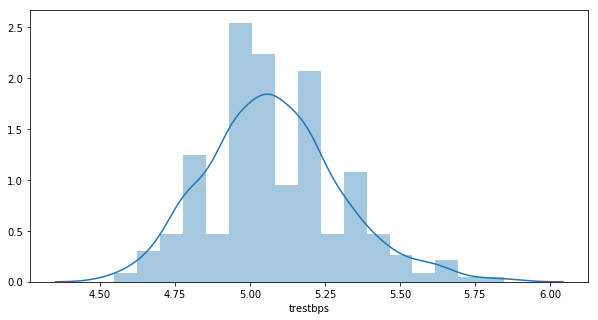

In [82]:
sns.distplot(np.cbrt(df['trestbps']))
np.cbrt(df['trestbps']).skew()

Cube root gives good values for trestbps

Three new features can be added in the table

In [83]:
df['chol']=np.cbrt(df['chol'])

In [84]:
df['trestbps']=np.cbrt(df['trestbps'])

In [85]:
df['chol'] = pd.cut(df['chol'], 3, labels=['low', 'medium', 'high'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,5.253588,medium,1,0,150,0,2.3,0,0,1,1
1,37,1,2,5.065797,medium,0,1,187,0,3.5,0,0,2,1
2,41,0,1,5.065797,low,0,0,172,0,1.4,2,0,2,1
3,56,1,1,4.932424,medium,0,1,178,0,0.8,2,0,2,1
4,57,0,0,4.932424,medium,0,1,163,1,0.6,2,0,2,1


In [87]:
categorical.append('chol')
numerical.remove('chol')

ValueError: list.remove(x): x not in list

In [88]:
df=pd.get_dummies(df, columns=['chol'])
df.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_low,chol_medium,chol_high
0,63,1,3,5.253588,1,0,150,0,2.3,0,0,1,1,0,1,0
1,37,1,2,5.065797,0,1,187,0,3.5,0,0,2,1,0,1,0
2,41,0,1,5.065797,0,0,172,0,1.4,2,0,2,1,1,0,0
3,56,1,1,4.932424,0,1,178,0,0.8,2,0,2,1,0,1,0
4,57,0,0,4.932424,0,1,163,1,0.6,2,0,2,1,0,1,0


increasing more features

Applying Model logistic regression

In [89]:
targets=df['target']
df.drop(columns=['target'],inplace=True)

In [90]:
# Normalize
#x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [92]:
from sklearn.model_selection import train_test_split
x_df, x_test, y_df, y_test = train_test_split(df,targets,test_size = 0.3)
print(x_df.shape,x_test.shape)

(212, 15) (91, 15)


In [93]:
scoring='accuracy'

In [94]:
cvFolds=5

In [95]:
max_iter=[100,110,120,130,140]
C=[1.0,1.5,2.0,2.5]
params=dict(max_iter=max_iter,C=C)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [97]:
lr=LogisticRegression(penalty='l2')
grid=GridSearchCV(estimator=lr, param_grid=params, cv=cvFolds, n_jobs=-1, scoring=scoring)
#start_time=time.time()
grid_result=grid.fit(x_df,y_df)

C:\Users\Dharani\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Dharani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:
print("tuned hpyerparameters :(best parameters)",grid_result.best_params_)
print("accuracy :",grid_result.best_score_)

tuned hpyerparameters :(best parameters) {'C': 1.0, 'max_iter': 100}
accuracy : 0.8301886792452831


In [99]:
lr=LogisticRegression(penalty='l2',max_iter=100,dual=True,C=1.0)
lr.fit(x_df,y_df)
lr.score(x_df,y_df)

C:\Users\Dharani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharani\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8254716981132075

In [100]:
from sklearn.metrics import accuracy_score
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.7912087912087912

In [101]:
#Try different degree of polynomial features
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
polyDf = polynomial_features.fit_transform(x_df)
#polyDf = pd.DataFrame(x_poly, columns=X_train.columns)
lrPoly2 = LogisticRegression()
lrPoly2.fit(polyDf, y_df)
lrPoly2.score(polyDf, y_df)
#polyDf

C:\Users\Dharani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9622641509433962

In [103]:
polyDfTest = polynomial_features.fit_transform(x_test)
y_pred = lrPoly2.predict(polyDfTest)
accuracy_score(y_test, y_pred)

0.7582417582417582

Conclusion:
logistic regression gives 83% efficiency